# Ecto statistics
- krait shield

In [84]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
# Завантаження даних з файлу
data = np.loadtxt('data.txt', delimiter='\t', dtype=int)
# Перевірка завантажених даних
print("Дані розмірність:\n", data.shape)
# Колонка для Ore
#ore_test = data[:, 0]  
#print(f"Перший елемент {ore_test}")

Дані розмірність:
 (122, 3)


In [86]:
price_ectoplasm = 28  # Ціна Ектоплазми
price_ore = 0.7
price_wood = 0.45
price_t6 = 0.85
price = np.array([price_ectoplasm, price_ore, price_wood])

In [87]:
r = (data * price).sum(axis=1)/250
print(f"Вартість одного Ітема при експерименті розщеплення {r}")

Вартість одного Ітема при експерименті розщеплення [24.0006 27.028  26.5054 26.101  27.7056 26.6548 25.4514 27.201  28.5632
 25.948  25.3972 26.1058 25.5812 26.2952 24.4452 27.2264 27.2276 25.8954
 28.374  26.0126 26.3278 24.3852 27.434  25.7688 25.7194 26.7436 26.8206
 28.0924 24.3924 25.291  25.1634 26.2874 24.592  25.9772 26.439  27.0114
 26.8994 28.2988 23.4692 24.2144 25.342  26.203  23.8574 27.8848 28.005
 24.0776 25.324  23.6554 22.174  28.2352 26.219  25.2216 25.315  26.771
 22.4652 26.3468 27.5578 25.8796 26.585  27.0006 25.112  19.483  26.6646
 26.3878 26.564  23.426  27.693  23.3628 27.2    25.4062 25.872  26.7474
 24.6638 25.553  26.6566 25.7672 25.8346 21.5166 23.7394 26.3232 22.4294
 25.6004 24.3978 26.6268 26.86   25.4406 23.9402 27.8948 25.5974 25.8748
 28.3506 25.0834 23.3562 25.3094 23.9306 24.9632 25.8912 26.871  25.5652
 26.674  23.691  27.8146 26.4348 24.7906 27.6736 27.678  26.5434 26.7062
 25.9798 26.143  23.723  26.4788 27.6462 26.6052 26.1512 27.253  27.9252
 2

In [88]:
# Задаємо ціни базових предметів
prices_base = np.array([price_t6, price_ore, price_wood])  # Ціни: [T6, руда, дерево]

cost_disassembly = 0.06  # Вартість розщеплення

# Кількість базових предметів, необхідних для створення одного предмета
resources_required = np.array([15, 11, 10])

price_of_crafting = sum(prices_base * resources_required)

print(f"Вартість одного предмету {price_of_crafting}")

Вартість одного предмету 24.95


In [89]:
# Знаходимо мін та макс для гістограми
# Робимо крок гістограми 0.5
bins = np.arange(np.floor(r.min()), np.ceil(r.max() + 1), 0.5)
bins[0:]

array([19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5, 23. , 23.5, 24. ,
       24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. , 28.5, 29. , 29.5])

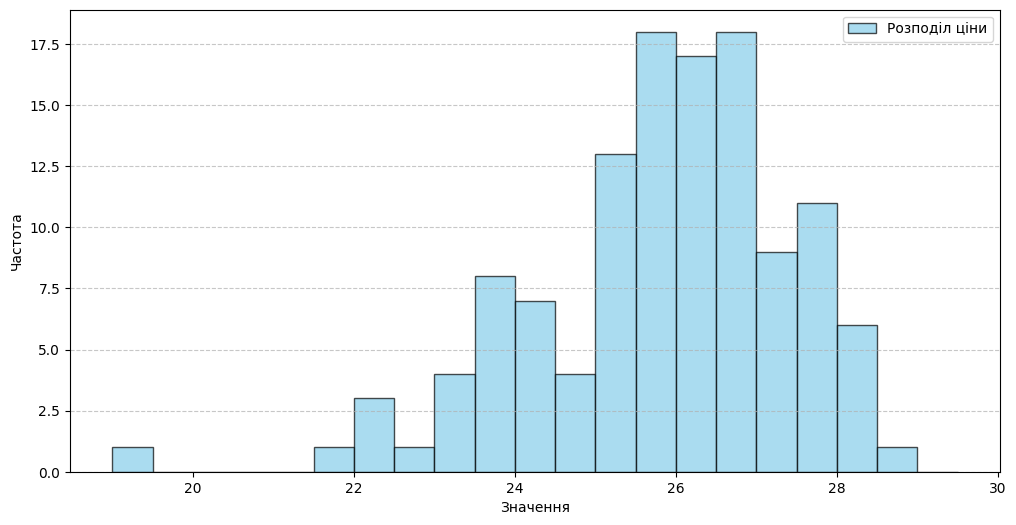

In [90]:
plt.figure(figsize=(12, 6))

plt.hist(r, bins=bins, color='skyblue', edgecolor='black', alpha=0.7, label="Розподіл ціни")

plt.xlabel('Значення')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

[19.483  21.5166 22.174  22.4294 22.4652 22.7618 23.3562 23.3628 23.426
 23.4692 23.6554 23.691  23.723  23.7394 23.8574 23.8798 23.9306 23.9402
 24.0006 24.0776 24.2144 24.3852 24.3924 24.3978 24.4452 24.592  24.6638
 24.7906 24.9632 25.0834 25.112  25.1634 25.2216 25.291  25.3094 25.315
 25.324  25.342  25.3972 25.4062 25.4406 25.4514 25.553  25.5652 25.5812
 25.5974 25.6004 25.6656 25.7194 25.7672 25.7688 25.8346 25.872  25.8748
 25.8796 25.8912 25.8954 25.948  25.9772 25.9798 26.0126 26.101  26.1058
 26.143  26.1512 26.203  26.219  26.2874 26.2952 26.3232 26.3278 26.3286
 26.3468 26.3878 26.4348 26.439  26.4788 26.5054 26.5434 26.564  26.585
 26.6052 26.6268 26.6548 26.6566 26.6646 26.674  26.7062 26.7436 26.7474
 26.771  26.8206 26.86   26.871  26.8994 27.0006 27.0114 27.028  27.2
 27.201  27.2264 27.2276 27.253  27.434  27.5578 27.6462 27.6736 27.678
 27.693  27.7056 27.8128 27.8146 27.8848 27.8948 27.9252 28.005  28.0924
 28.2352 28.2988 28.3506 28.374  28.5632]


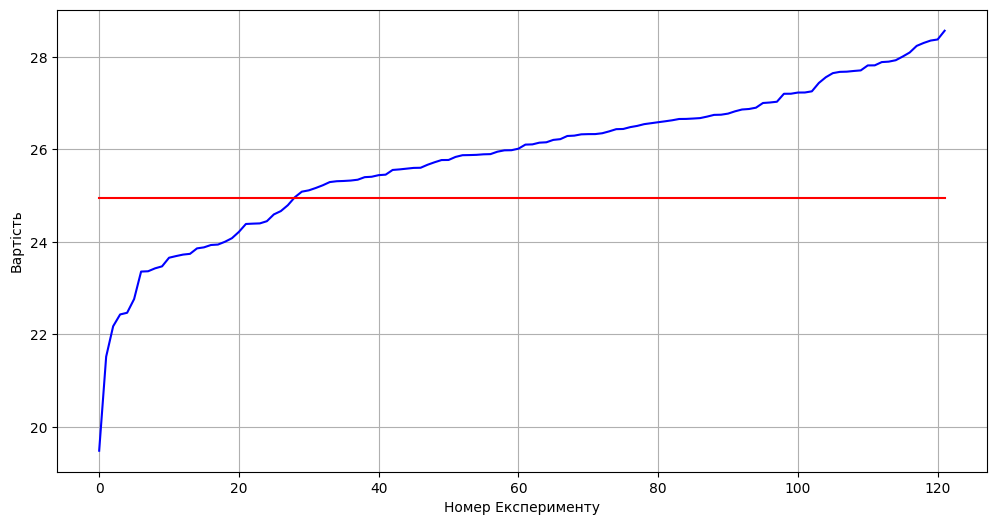

In [91]:
r_sorted = np.array(sorted(r))
print(r_sorted)

plt.figure(figsize=(12, 6))


plt.plot(r_sorted, color='blue')
plt.plot(np.repeat(price_of_crafting, 122), color='red')
plt.ylabel("Вартість")
plt.xlabel("Номер Експерименту")
plt.grid()
plt.show()

In [92]:
profit_crafting = r_sorted - price_of_crafting
print(f"Прибуток як різниця між вартість та отриманим результатом {profit_crafting.sum()/122}")

Прибуток як різниця між вартість та отриманим результатом 0.8818311475409844


Середня кількість Ектоплами: 221.57
Середня кількість руди: 222.64
Середня кількість дерева: 217.88
Собівартість створення одного предмета: 25.01 монет
Середній прибуток: 6432.95 монет на одну операцію


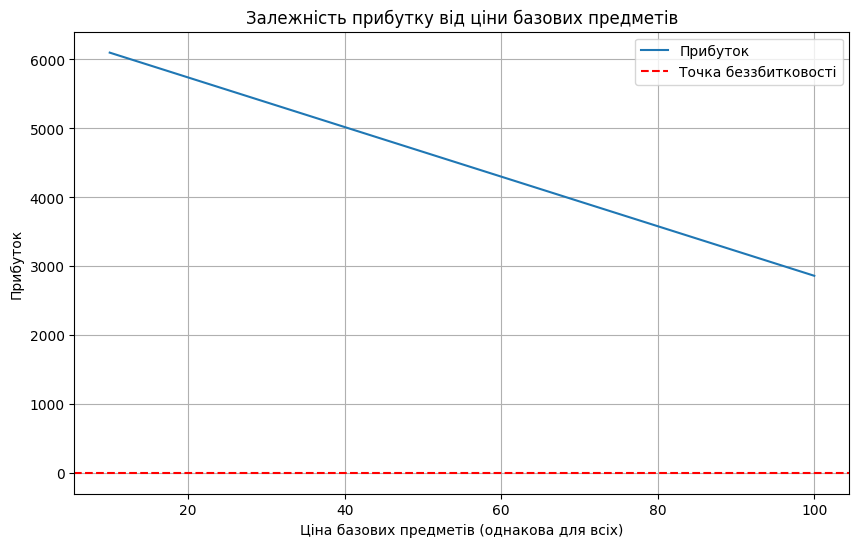

In [93]:
# Завантаження даних про результати розщеплення
ectoplasm, ore, wood = data[:, 0], data[:, 1], data[:, 2]

# Розрахунок середньої кількості отриманих предметів
avg_ectoplasm = np.mean(ectoplasm)
avg_ore = np.mean(ore)
avg_wood = np.mean(wood)

# Розрахунок середньої виручки
avg_revenue = avg_ectoplasm * price_ectoplasm + avg_ore * prices_base[1] + avg_wood * prices_base[2]

# Розрахунок собівартості
cost_per_item = np.sum(resources_required * prices_base) + cost_disassembly

# Розрахунок прибутку
profit = avg_revenue - cost_per_item

# Виведення результатів
print(f"Середня кількість Ектоплами: {avg_ectoplasm:.2f}")
print(f"Середня кількість руди: {avg_ore:.2f}")
print(f"Середня кількість дерева: {avg_wood:.2f}")
print(f"Собівартість створення одного предмета: {cost_per_item:.2f} монет")
print(f"Середній прибуток: {profit:.2f} монет на одну операцію")

# Візуалізація залежності прибутку від ціни базових предметів
prices_variation = np.linspace(10, 100, 50)  # Варіюємо ціну базових предметів
profits = []

for price in prices_variation:
    temp_prices = np.array([price, price, price])
    temp_cost = np.sum(resources_required * temp_prices) + cost_disassembly
    temp_profit = avg_revenue - temp_cost
    profits.append(temp_profit)

plt.figure(figsize=(10, 6))
plt.plot(prices_variation, profits, label="Прибуток")
plt.axhline(0, color='red', linestyle='--', label="Точка беззбитковості")
plt.xlabel("Ціна базових предметів (однакова для всіх)")
plt.ylabel("Прибуток")
plt.title("Залежність прибутку від ціни базових предметів")
plt.legend()
plt.grid()
plt.show()
